# BEATS 3PW plots
Last modified: 27/04/2021

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from pandas_ods_reader import read_ods
import h5py
import silx.io

%precision %.3g
%matplotlib inline

In [30]:
def geth5image(h5data):
    entry = h5data["entry"]
    data0 = entry["data0"]
    return data0["image"][:,:]

In [18]:
def geth5coors(h5data):
    entry = h5data["entry"]
    data0 = entry["data0"]
    x = data0["x"][:].astype("float64")
    y = data0["y"][:].astype("float64")
    return x, y

In [19]:
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def fwhm(x, y):
    x = x.tolist()
    y = y.tolist()
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)]

# 07f_a: Photon source characterization

## Photon source size and divergence @ 5, 10 and 20 keV (from Oasys/Shadow)

#### Read Shadow data on source size and divergence

In [20]:
source_plots_dir = 'beam_snapshots/3PW/'
# X_5 = np.load(source_plots_dir + '5keV_XXp.npy')

In [31]:
# read with silx.io
XXp_5 = silx.io.open(source_plots_dir + '5keV_XXp.h5')
ZZp_5 = silx.io.open(source_plots_dir + '5keV_ZZp.h5')
XXp_10 = silx.io.open(source_plots_dir + '10keV_XXp.h5')
ZZp_10 = silx.io.open(source_plots_dir + '10keV_ZZp.h5')
XXp_20 = silx.io.open(source_plots_dir + '20keV_XXp.h5')
ZZp_20 = silx.io.open(source_plots_dir + '20keV_ZZp.h5')

source_5to60keV = silx.io.open(source_plots_dir + '5-60keV.h5')

In [32]:
X_5 = geth5image(XXp_5)
Y_5 = geth5image(ZZp_5)
X_10 = geth5image(XXp_10)
Y_10 = geth5image(ZZp_10)
X_20 = geth5image(XXp_20)
Y_20 = geth5image(ZZp_20)

X_5c, Xp_5c = geth5coors(XXp_5)
Y_5c, Yp_5c = geth5coors(ZZp_5)
X_10c, Xp_10c = geth5coors(XXp_10)
Y_10c, Yp_10c = geth5coors(ZZp_10)
X_20c, Xp_20c = geth5coors(XXp_20)
Y_20c, Yp_20c = geth5coors(ZZp_20)

profile_5to60keV = geth5image(source_5to60keV)
X_5to60keV, Y_5to60keV = geth5coors(source_5to60keV)

#### Calculate source size and divergence FWHM

In [34]:
FWHM_X = np.array([fwhm(X_5c*0.001, X_5.sum(axis=0))[0],
                 fwhm(X_10c*0.001, X_10.sum(axis=0))[0],
                 fwhm(X_20c*0.001, X_20.sum(axis=0))[0]])
sigma_X = FWHM_X/2.355

FWHM_Xp = np.array([fwhm(Xp_5c*0.001, X_5.sum(axis=1))[0],
                 fwhm(Xp_10c*0.001, X_10.sum(axis=1))[0],
                 fwhm(Xp_20c*0.001, X_20.sum(axis=1))[0]])
sigmap_X = FWHM_Xp/2.355

FWHM_Y = np.array([fwhm(Y_5c, Y_5.sum(axis=0))[0],
                 fwhm(Y_10c, Y_10.sum(axis=0))[0],
                 fwhm(Y_20c, Y_20.sum(axis=0))[0]])
sigma_Y = FWHM_Y/2.355

FWHM_Yp = np.array([fwhm(Yp_5c, Y_5.sum(axis=1))[0],
                 fwhm(Yp_10c, Y_10.sum(axis=1))[0],
                 fwhm(Yp_20c, Y_20.sum(axis=1))[0]])
sigmap_Y = FWHM_Yp/2.355

FWHM_X_5to60keV = np.array([fwhm(X_5to60keV*0.001, profile_5to60keV.sum(axis=0))[0]])
sigma_X_5to60keV = FWHM_X_5to60keV/2.355

#### Plots

In [63]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

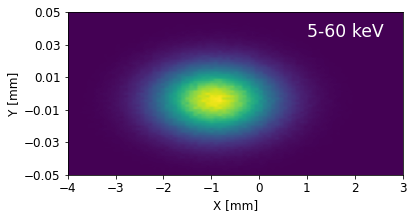

In [62]:
# plot source snapshot
f, ax = plt.subplots()
plt.imshow(profile_5to60keV, extent=[X_5to60keV.min()*0.001,X_5to60keV.max()*0.001,Y_5to60keV.min()*0.001,Y_5to60keV.max()*0.001], aspect=34)
plt.plot(np.array([-5, 5]), np.array([0, 0]), 'r', alpha=0)
plt.plot(np.array([0, 0]), np.array([-5, 5]), 'r', alpha=0)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
ax.set(xlim=(-4, 3), ylim=(-0.05, 0.05))
# plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-0.05, 0.07, 0.02))
# plt.legend([f"$FWHM_x=1.89mm$; $FWHM_y=32 \mu m$"], loc='upper right', borderaxespad=0.)
# ax.annotate('5-60 keV; $FWHM_x=1.89mm$; $FWHM_y=32 \mu m$', xy=(-3, 0.04), xytext=(-3, 0.04), fontsize='x-large', c='w')
ax.annotate('5-60 keV', xy=(1, 0.035), xytext=(1, 0.035), fontsize='x-large', c='w')
f.savefig("beam_snapshots/3PW/source_snapshot_5-60keV.png", bbox_inches='tight', dpi=600)

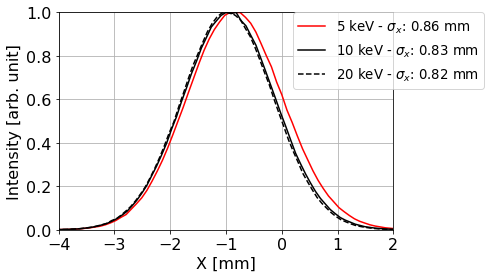

In [64]:
# plot X-intensity
norm = np.array([X_5.sum(axis=0).max(), X_10.sum(axis=0).max(), X_20.sum(axis=0).max()])

f, ax = plt.subplots()
plt.plot(X_5c*0.001, X_5.sum(axis=0)/norm[0], 'r', 
         X_10c*0.001, X_10.sum(axis=0)/norm[1], 'k',
         X_20c*0.001, X_20.sum(axis=0)/norm[2], '--k')

plt.xlabel('X [mm]')
plt.ylabel('Intensity [arb. unit]')
plt.xticks(np.arange(-4, 4, 1))
ax.set(xlim=(-4, 2), ylim=(0, 1))
plt.grid(True, which="both")

plt.legend(["5 keV - $\sigma_x$: %0.2f mm" % sigma_X[0],
            "10 keV - $\sigma_x$: %0.2f mm" % sigma_X[1],
            "20 keV - $\sigma_x$: %0.2f mm" % sigma_X[2]], bbox_to_anchor=(0.7, 1), borderaxespad=0., loc='upper left', fontsize="small")

f.savefig("beam_snapshots/3PW/sigmaX.png", bbox_inches='tight', dpi=600)

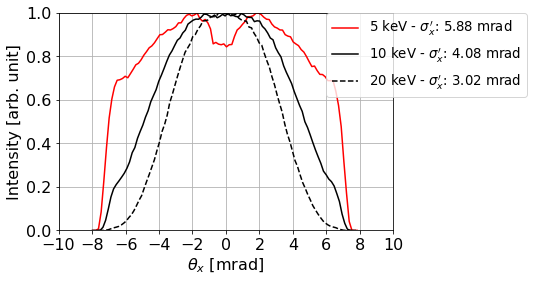

In [68]:
# plot of Xp-intensity
norm = np.array([X_5.sum(axis=1).max(), X_10.sum(axis=1).max(), X_20.sum(axis=1).max()])

f, ax = plt.subplots()
plt.plot(Xp_5c*0.001, X_5.sum(axis=1)/norm[0], 'r', 
         Xp_10c*0.001, X_10.sum(axis=1)/norm[1], 'k',
         Xp_20c*0.001, X_20.sum(axis=1)/norm[2], '--k')

plt.xlabel(r'$\theta_x$ [mrad]')
plt.ylabel('Intensity [arb. unit]')
plt.xticks(np.arange(-10, 11, 2))
ax.set(xlim=(-10, 10), ylim=(0, 1))

plt.grid(True, which="both")

plt.legend(["5 keV - $\sigma_x'$: %0.2f mrad" % sigmap_X[0],
            "10 keV - $\sigma_x'$: %0.2f mrad" % sigmap_X[1],
            "20 keV - $\sigma_x'$: %0.2f mrad" % sigmap_X[2]], bbox_to_anchor=(0.8, 1), borderaxespad=0., loc='upper left', fontsize="small")

f.savefig("beam_snapshots/3PW/sigmaXp.png", bbox_inches='tight', dpi=600)

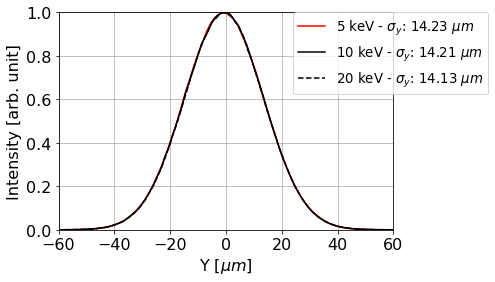

In [66]:
# plot Y-intensity
norm = np.array([Y_5.sum(axis=0).max(), Y_10.sum(axis=0).max(), Y_20.sum(axis=0).max()])

f, ax = plt.subplots()
plt.plot(Y_5c, Y_5.sum(axis=0)/norm[0], 'r', 
         Y_10c, Y_10.sum(axis=0)/norm[1], 'k',
         Y_20c, Y_20.sum(axis=0)/norm[2], '--k')

plt.xlabel('Y [$\mu m$]')
plt.ylabel('Intensity [arb. unit]')
plt.xticks(np.arange(-60, 70, 20))
ax.set(xlim=(-60, 60), ylim=(0, 1))
plt.grid(True, which="both")

plt.legend(["5 keV - $\sigma_y$: %0.2f $\mu m$" % sigma_Y[0],
            "10 keV - $\sigma_y$: %0.2f $\mu m$" % sigma_Y[1],
            "20 keV - $\sigma_y$: %0.2f $\mu m$" % sigma_Y[2]], bbox_to_anchor=(0.7, 1), borderaxespad=0., loc='upper left', fontsize="small")

f.savefig("beam_snapshots/3PW/sigmaY.png", bbox_inches='tight', dpi=600)

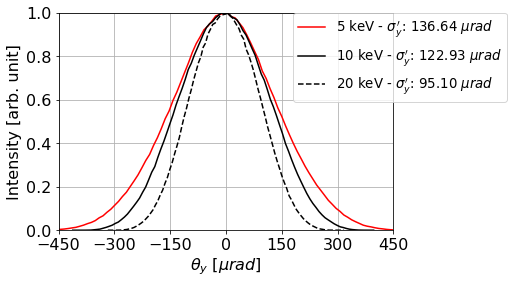

In [67]:
# plot of Yp-intensity
norm = np.array([Y_5.sum(axis=1).max(), Y_10.sum(axis=1).max(), Y_20.sum(axis=1).max()])

f, ax = plt.subplots()
plt.plot(Yp_5c, Y_5.sum(axis=1)/norm[0], 'r', 
         Yp_10c, Y_10.sum(axis=1)/norm[1], 'k',
         Yp_20c, Y_20.sum(axis=1)/norm[2], '--k')

plt.xlabel(r'$\theta_y$ [$\mu rad$]')
plt.ylabel('Intensity [arb. unit]')
plt.xticks(np.arange(-450, 550, 150))
ax.set(xlim=(-450, 450), ylim=(0, 1))
plt.grid(True, which="both")

plt.legend(["5 keV - $\sigma_y'$: %0.2f $\mu rad$" % sigmap_Y[0],
            "10 keV - $\sigma_y'$: %0.2f $\mu rad$" % sigmap_Y[1],
            "20 keV - $\sigma_y'$: %0.2f $\mu rad$" % sigmap_Y[2]], bbox_to_anchor=(0.7, 1), borderaxespad=0., loc='upper left', fontsize="small")

f.savefig("beam_snapshots/3PW/sigmaYp.png", bbox_inches='tight', dpi=600)